# NN Classifier (BERT-Boosted) x Toxic Content Detection
Il presente Notebook mostra l'addestramento ed il testing di un Classificatore basato su una rete Fully connected per il task di Toxic Content Detection.

I dati sono stati processati come segue:
1. Pulizia del testo (si veda 'dataset_preprocessing.py')
2. Estrazione delle Features mediante BERT (si veda 'feature_extraction_bert_windows.ipynb'/'feature_extraction_bert_mac.ipynb')

In [91]:
import pandas as pd
import numpy as np
import pickle
import nltk
import re
import torch
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from datetime import datetime
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix, ConfusionMatrixDisplay

In [92]:
training_set = pd.read_csv("./../../datasets/training_set.csv")

# Osservazione: il Training Set è stato già ripulito
training_set

,comment_text,toxic
0,cocksucker before you piss around on my work,1
1,hey what is it talk what is it an exclusive gr...,1
2,bye dont look come or think of comming back to...,1
3,you are gay or antisemmitian archangel white t...,1
4,fuck your filthy mother in the ass dry,1
...,...,...
30572,chris i dont know who you are talking to but i...,0
30573,operation condor is also named a dirty war can...,0
30574,there is no evidence that this block has anyth...,0
30575,thanks hey utkarshraj thanks for the kindness ...,0


In [93]:
y_train = training_set['toxic']

# Addestramento del Sistema
Il Sistema è ovviamente riaddestrabile a piacere. Si consiglia, tuttavia, dato il tempo necessario per riaddestrare il classificatore, di utilizzare il file pickle 'nn_classifier' per eseguire subito gli esperimenti.

In [94]:
X_train = pd.read_csv("./../../datasets/X_train_bert.csv")
print("X_train.shape", X_train.shape)

X_train.shape (30577, 768)


In [95]:
model_filename = 'nn_classifier.pkl'
model = None

In [96]:
# define model
model = Sequential()
model.add(Dense(768, input_shape=(768,), activation='relu'))
model.add(Dropout(0.5))  
model.add(Dense(534, activation='relu'))
model.add(Dropout(0.5))  
model.add(Dense(318, activation='relu'))
model.add(Dropout(0.5))  
model.add(Dense(109, activation='relu'))
model.add(Dropout(0.5))  
model.add(Dense(54, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [97]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
print("Training started...")
start = datetime.now()
model.fit(X_train, y_train, epochs=50, batch_size=32)
end = datetime.now()
print("Training completed! Required time: " + str(end-start))

with open(model_filename, 'wb') as f:
    pickle.dump(model, f)

Training started...
Epoch 1/50
956/956 [==============================] - 4s 4ms/step - loss: 0.3087 - accuracy: 0.8692
Epoch 2/50
956/956 [==============================] - 4s 4ms/step - loss: 0.2644 - accuracy: 0.8941
Epoch 3/50
956/956 [==============================] - 4s 4ms/step - loss: 0.2554 - accuracy: 0.8987
Epoch 4/50
956/956 [==============================] - 4s 4ms/step - loss: 0.2484 - accuracy: 0.8992
Epoch 5/50
956/956 [==============================] - 4s 4ms/step - loss: 0.2429 - accuracy: 0.9030
Epoch 6/50
956/956 [==============================] - 4s 4ms/step - loss: 0.2371 - accuracy: 0.9055
Epoch 7/50
956/956 [==============================] - 4s 4ms/step - loss: 0.2329 - accuracy: 0.9069
Epoch 8/50
956/956 [==============================] - 4s 4ms/step - loss: 0.2281 - accuracy: 0.9093
Epoch 9/50
956/956 [==============================] - 4s 4ms/step - loss: 0.2237 - accuracy: 0.9120
Epoch 10/50
956/956 [==============================] - 4s 4ms/step - loss: 0.219

In [99]:
with open(model_filename, 'rb') as f:
    model = pickle.load(f)

# Testing del Sistema

In [100]:
test_data = pd.read_csv("./../../datasets/test_set.csv")
test_data.dropna(inplace=True)
test_set = test_data[test_data['toxic'] != -1]

In [101]:
y_test = test_set['toxic']
print("y_test.shape: " + str(y_test.shape))

y_test.shape: (63842,)


In [102]:
X_test = pd.read_csv("./../../datasets/X_test_bert.csv")
print("X_test.shape:", X_test.shape)

X_test.shape: (63842, 768)


In [103]:
y_pred = model.predict(X_test)
print(y_pred)

y_pred_binary = np.where(y_pred > 0.5, 1, 0)

#Metriche: Accuracy,Precision,Recall
print("Accuracy: " + str(accuracy_score(y_test, y_pred_binary)))
print("Precision: " + str(precision_score(y_test, y_pred_binary)))
print("Recall: " + str(recall_score(y_test, y_pred_binary)))

1996/1996 [==============================] - 3s 1ms/step
[[1.5801824e-08]
 [1.0000000e+00]
 [7.8070170e-01]
 ...
 [1.0000000e+00]
 [1.0000000e+00]
 [2.9578301e-01]]
Accuracy: 0.8500046991009054
Precision: 0.37789598936095753
Recall: 0.8869722359126007


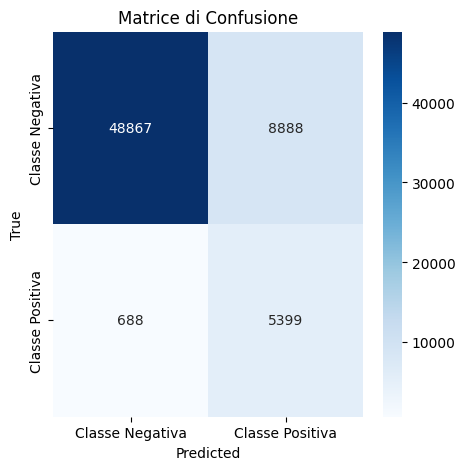

In [106]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Definisci le etichette delle classi
classes = ['Classe Negativa', 'Classe Positiva']

# Plotta la matrice di confusione
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matrice di Confusione')
plt.show()